# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [99]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [100]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox_api_key")

## Load Data

In [83]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
mean_units_per_year = sfo_data.groupby('year').mean()['housing_units']
mean_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [5]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

mean_units_per_year.to_csv(Path('units_per_year.csv'))

<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='Years', ylabel='Housing Units'>

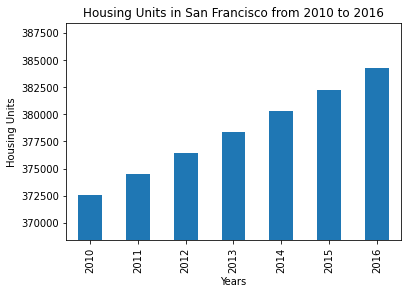

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
units_y = [mean_units_per_year.min() - mean_units_per_year.std(), mean_units_per_year.max() + mean_units_per_year.std()]
mean_units_per_year.plot.bar(xlabel = 'Years', ylabel = 'Housing Units', ylim = units_y, title = 'Housing Units in San Francisco from 2010 to 2016')


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!
mean_gross_rent = sfo_data.groupby('year').mean()['gross_rent']
mean_price_sqr_foot = sfo_data.groupby('year').mean()['sale_price_sqr_foot']


<AxesSubplot:title={'center':'Average Price per SqFt by Year'}, xlabel='Year', ylabel='Price per SqFt'>

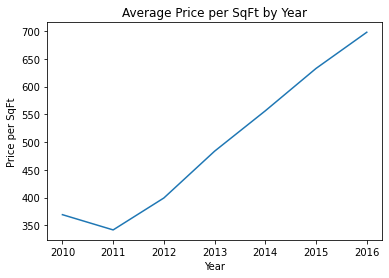

In [8]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
mean_price_sqr_foot.plot.line(xlabel = 'Year', ylabel = 'Price per SqFt', title = 'Average Price per SqFt by Year')




<AxesSubplot:title={'center':'Average Gross Rent by Year'}, xlabel='Year', ylabel='Gross Rent'>

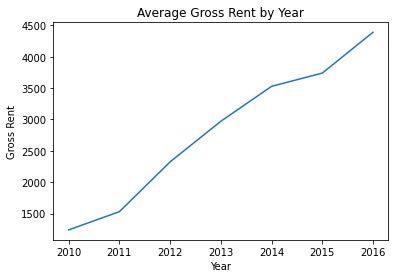

In [9]:
# Line chart for average montly rent
# YOUR CODE HERE!
mean_gross_rent.plot.line(xlabel = 'Year', ylabel = 'Gross Rent', title = 'Average Gross Rent by Year')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [10]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
mean_price_year_hood = sfo_data.groupby(['year', 'neighborhood']).mean()
mean_price_year_hood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [39]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
mean_price_year_hood['sale_price_sqr_foot'].hvplot.line(xlabel = 'Year', ylabel = 'Avg Price/SqFt', groupby = 'neighborhood', title = 'Average Price per SqFt by Neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [40]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
mean_price_year_hood['gross_rent'].hvplot.line(xlabel = 'Year', ylabel = 'Avg Gross Rent', groupby = 'neighborhood', title = 'Average Rent by Neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [32]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!
top_10 = sfo_data.groupby('neighborhood').mean()['sale_price_sqr_foot'].sort_values(ascending = False).head(10)
top_10

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

In [71]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top_10_y = [top_10.min() - (top_10.std() / 2), top_10.max() + (top_10.std() / 2)]
top_10_plot = top_10.hvplot.bar(height = 450, xlabel = 'Neighborhood', ylabel = 'Avg. Sale Price per Square Foot', rot = 90, ylim = top_10_y, title = 'Top 10 Expensive Neighborhoods in SFO')
top_10_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [50]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!
mean_price_year_hood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [104]:
# Plot side-by-side comparison of average price per square foot versus average monthly rent by year with a dropdown selector for the neighborhood
mean_price_year_hood.hvplot.bar(height = 450, x = 'year', y = ['gross_rent', 'sale_price_sqr_foot'], stacked = False, xlabel = 'Year', ylabel = 'USD', rot = 90, groupby = 'neighborhood', title = 'Average Rent by Neighborhood')

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [81]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!
map_data = pd.read_csv('Data/neighborhoods_coordinates.csv').set_index('Neighborhood')
map_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [84]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
sfo_mean = sfo_data.rename(str.title, axis = 'columns').groupby('Neighborhood').mean()
sfo_mean.head()

,Sale_Price_Sqr_Foot,Housing_Units,Gross_Rent
Neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [92]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
joined_data = pd.merge(map_data, sfo_mean, how = 'inner', on = 'Neighborhood')
joined_data.head()

,Lat,Lon,Sale_Price_Sqr_Foot,Housing_Units,Gross_Rent
Neighborhood,,,,,
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

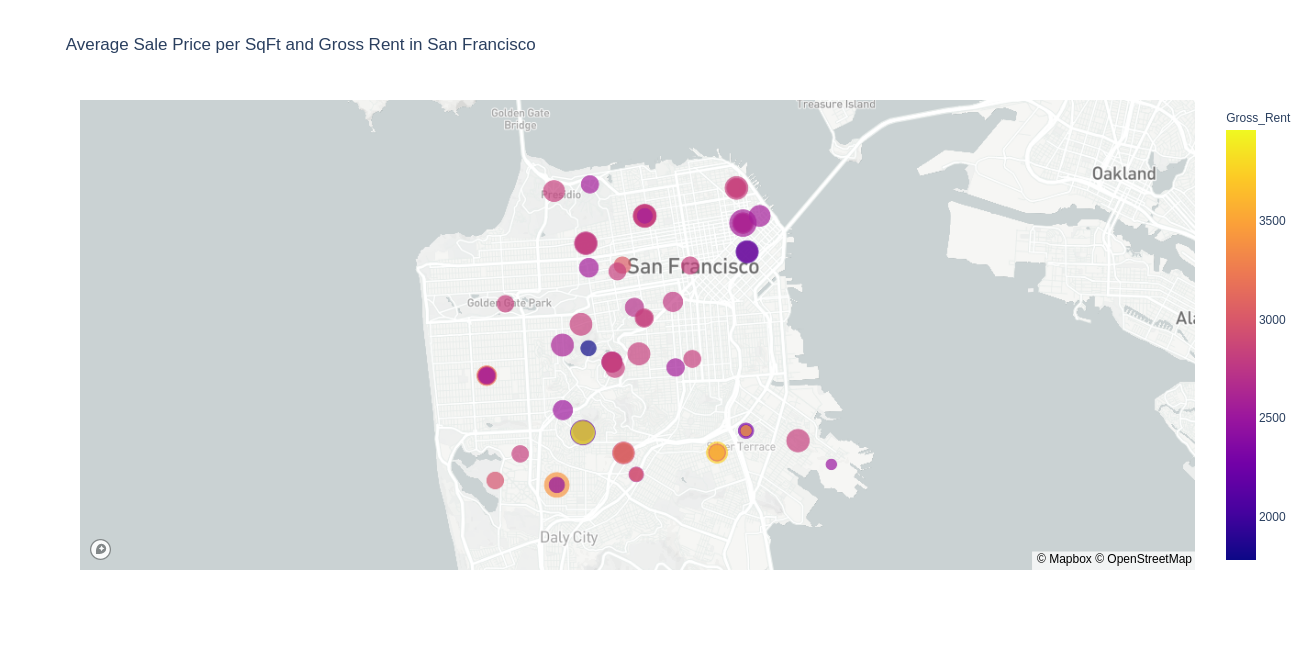

In [114]:
# Set the mapbox access token
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
map_plot = px.scatter_mapbox(
    joined_data,
    lat = 'Lat',
    lon = 'Lon',
    size = 'Sale_Price_Sqr_Foot',
    color = 'Gross_Rent',
    zoom = 11,
    title = 'Average Sale Price per SqFt and Gross Rent in San Francisco',
    height = 650
)
map_plot

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [21]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

NameError: name 'df_costs' is not defined

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!